# Análisis del conjunto de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms

In [2]:
data_dir = './data'
img_size = (224, 224)
bs = 12
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

#### Cargamos fichero con las categorías

In [3]:
df = pd.read_csv('categorias_iNat2021.txt', sep = '\t')

#### Cargamos las imágenes del conjunto de entrenamiento

In [4]:
transformacion_datos = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
    ])

conjunto_datos = datasets.INaturalist(
    root = data_dir,
    version = '2021_train_mini',
    transform = transformacion_datos,
    download = False # True la primera vez para descagar los datos de internet
    )

cargador_datos = torch.utils.data.DataLoader(
    conjunto_datos,
    batch_size = bs,
    shuffle = True,
    num_workers = 4
    )

#### Ejemplo del conjunto de entrenamiento

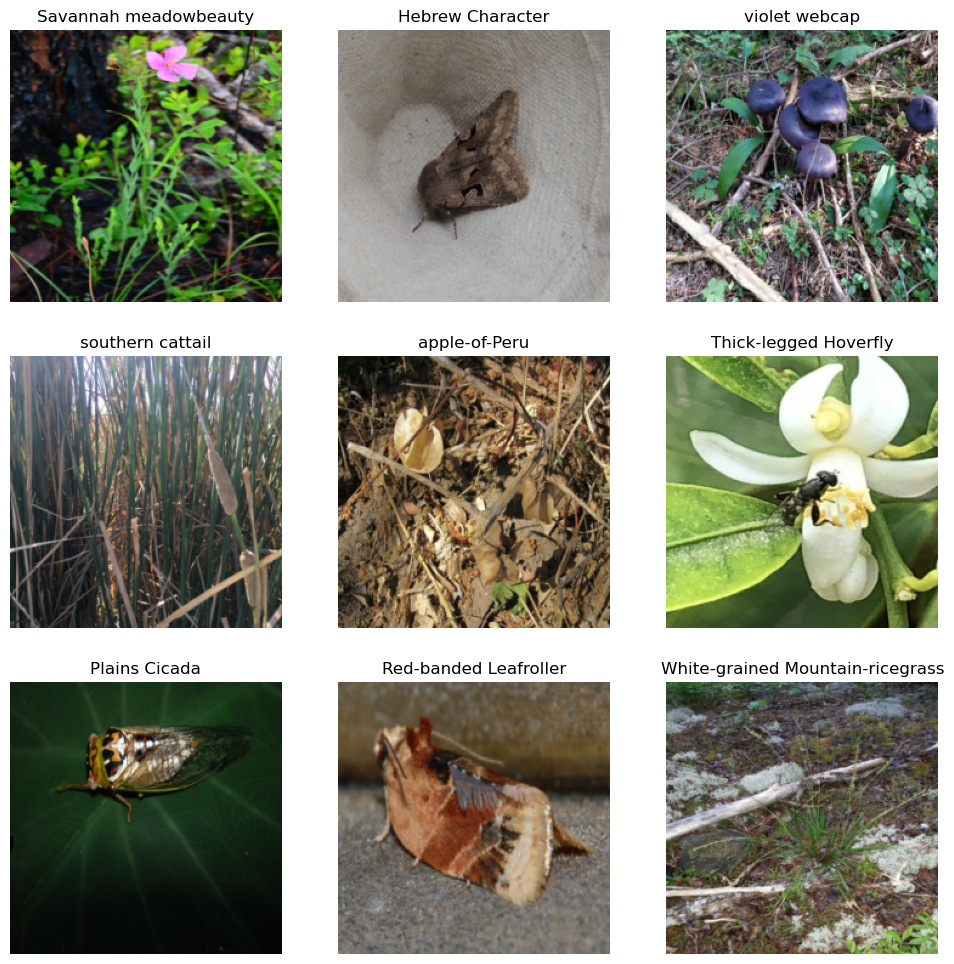

In [5]:
images, labels = next(iter(cargador_datos))

rows = 3
columns = 3
fig=plt.figure(figsize=(12,12))
for i in range(9):
    fig.add_subplot(rows, columns, i+1)
    plt.title(df.loc[labels[i].item()].common_name)
    img = images[i].numpy().transpose((1, 2, 0))
    img = std * img + mean
    img =np.clip(img, 0, 1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

Pearl-bordered Fritillary


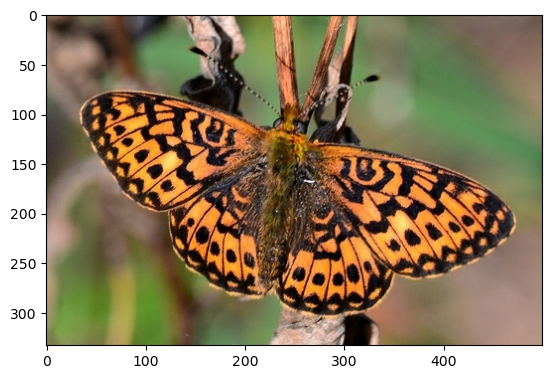

In [9]:
print(df.loc[1799].common_name)

image_path="./data/2021_train_mini/01799_Animalia_Arthropoda_Insecta_Lepidoptera_Nymphalidae_Boloria_euphrosyne/6cc24c91-8f40-4d20-980a-daba02c829bd.jpg"
image = plt.imread(image_path)
plt.imshow(image)

Pacific Fritillary


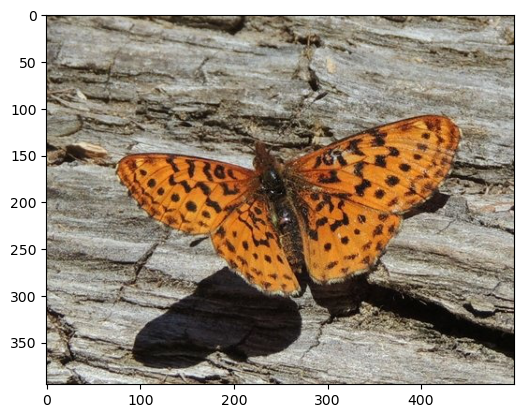

In [10]:
print(df.loc[1798].common_name)

image_path="./data/2021_train_mini/01798_Animalia_Arthropoda_Insecta_Lepidoptera_Nymphalidae_Boloria_epithore/a1bb357a-15b8-4fa9-bfe6-cbd083cf32e7.jpg"
image = plt.imread(image_path)
plt.imshow(image)